## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy. Here are the objectives:

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np

In [2]:
# our toy data for this task
# experiment with the number of points, more
# points should be easier for debugging as
# statistical noise will be smaller
n_points = 20
X = np.random.uniform(0, 10, size=n_points)
temp = 1.3*X + 15 + np.random.normal(0, 1, size=n_points)

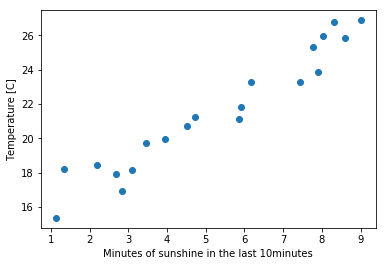

In [3]:
# Plot the data, on the x axis
# the minutes of sunshine and on
# the y-axis the temperature
### BEGIN SOLUTION
plt.plot(X, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10minutes")
plt.ylabel("Temperature [C]");
### END SOLUTION

Next is the big `LinearRegression` class. Once you fill in all the gaps it will let you perform linear regression and we will keep building on this class' structure during the day. Maybe a class structure like this is overkill for linear regression, but we can use the same structure for our simple neural network later.

We will perform linear regression and find the coefficients `W` and `b` by gradient descent. This is not how you would solve this in reality, but stick with it for the moment so we can create the basis for Logistic Regression later.

In [5]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        # TODO: for each sample in X return the predicted value, X is a vector!
        ### BEGIN SOLUTION
        return X*self.W + self.b
        ### END SOLUTION
    
    def grad_loss(self, x, y_true):
        # TODO?: compute gradient with respect to W and b for one sample x
        # and the true value y_true
        ### BEGIN SOLUTION
        grad_W = -1. * x * (y_true - (self.W*x + self.b))
        grad_b = -1. * (y_true - (self.W*x + self.b))
        grads = {"W": grad_W, "b": grad_b}
        return grads
        ### END SOLUTION
    
    def train(self, x, y, learning_rate):
        # TODO: compute one step of the gradient descent update
        ### BEGIN SOLUTION
        grads = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads["W"]
        self.b = self.b - learning_rate * grads["b"]
        ### END SOLUTION
        
    def loss(self, x, y):
        # TODO: compute the loss for the sample x with true value y
        ### BEGIN SOLUTION
        return (self.predict(x) - y)**2
        ### END SOLUTION

    def accuracy(self, X, y):
        # TODO: compute accuracy for samples X with true values y
        ### BEGIN SOLUTION
        y_predict = self.predict(X)
        return np.sum(y_predict - y)**2 / X.shape[0]
        ### END SOLUTION

Questions:

* how do you know that you trained for enough epochs?
* visualise how the loss changes over the epochs
* are more epochs always better? How could you show this?
* change the setup to use stochastic gradient descent
* (bonus) visualise the values of W and b over the epochs
* (bonus) can you see a difference for the paths of W and b between mini batch SGD and single sample SGD?

In [6]:
lr = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

initial value of W: -0.1960 and b: -0.3831


In [7]:
from sklearn.utils import shuffle

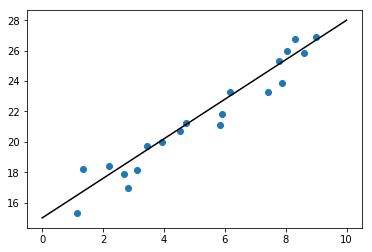

In [8]:
lr = LinearRegression()
lr.W = 1.3
lr.b = 15.

line = np.linspace(0, 10, 100)

plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line), c='k');

starting at W=-0.202 b=-0.454


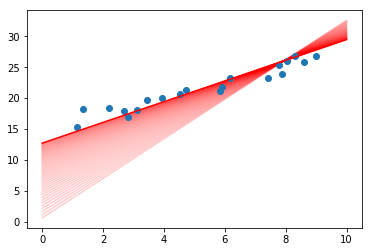

In [9]:
lr = LinearRegression()
print('starting at W=%.3f b=%.3f' % (lr.W, lr.b))
learning_rate = 0.01

# train the model by looping through the
# data 100 times. After each sample we
# update the weights W and bias b
for n in range(50):
    for (x_, y_) in zip(X, temp):
        lr.train(x_, y_, learning_rate)
    train_acc = lr.accuracy(X, temp)
    plt.plot(line, lr.predict(line), c='r', alpha=0.2)

plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line), c='r');

In [ ]:
train_acc

In [ ]:
# Modify the training procedure to use
# stochastic gradient descent. With a
# mini batch size of 10

lr = LinearRegression()
learning_rate = 0.01
batch_size = 10

for n in range(100):
    ### BEGIN SOLUTION
    X_shuffled, temp_shuffled = shuffle(X, temp)
    for i, (x_, y_) in enumerate(zip(X_shuffled[:batch_size], temp_shuffled[:batch_size])):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(X, temp)
    ### END SOLUTION

plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line), c='r');

In [10]:
lr = LinearRegression()

# 0.01 converges quickly, but seems to struggle with settling/bounces around
# with this small learning rate (0.001) we need to bump up the number of epochs to
# ~400 or more
learning_rate = 0.01
n_epochs = 100

Ws = [lr.W]
bs = [lr.b]
losses = [lr.accuracy(X, temp)]
for n in range(n_epochs):
    # shuffle points before each iteration, then selecting first N points
    # is a nice way of doing stochastic gradient descent
    x_shuffled, temp_shuffled = shuffle(X, temp)
    for i, (x_, y_) in enumerate(zip(x_shuffled, temp_shuffled)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(X, temp)
        # turn on mini batches
        if i > 20:
            break
        
    Ws.append(lr.W)
    bs.append(lr.b)
    losses.append(lr.accuracy(X, temp))
    # maybe what we should do is reduce the learning rate as training progresses
    # big steps at first, then smaller ones, start at 0.01
    #learning_rate *= 0.9
    # with a large number of iterations this gets a bit noisy
    #print("Update: train accuracy: %0.3f"% (train_acc), end=' ')
    #print('value of W: %.4f and b: %.4f' % (lr.W, lr.b))

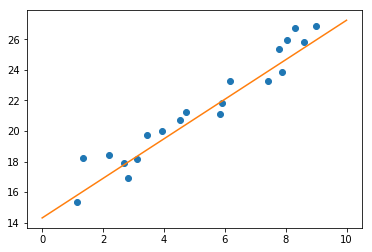

In [11]:
line = np.linspace(0, 10, 100)
plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line));

Text(0,0.5,'b')

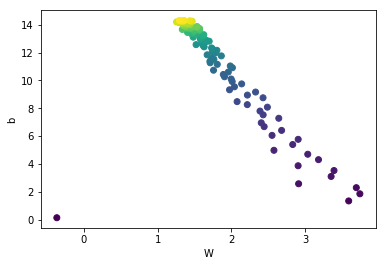

In [12]:
plt.scatter(Ws, bs, c=range(len(Ws)))
plt.xlabel('W')
plt.ylabel('b')

## With validation data

In [ ]:
# make some validation data
N = 2000
X_val = np.random.uniform(0, 10, size=N)
temp_val = 1.3*X_val + 15 + np.random.normal(0, 1, size=N)

In [ ]:
lr = LinearRegression()

# 0.01 converges quickly, but seems to struggle with settling/bounces around
# with this small learning rate (0.001) we need to bump up the number of epochs to
# ~400 or more
learning_rate = 0.01
n_epochs = 200

losses = [lr.accuracy(X, temp)]
val_losses = [lr.accuracy(X_val, temp_val)]
for n in range(n_epochs):
    # shuffle points before each iteration, then selecting first N points
    # is a nice way of doing stochastic gradient descent
    x_shuffled, temp_shuffled = shuffle(X, temp, random_state=1)
    for i, (x_, y_) in enumerate(zip(x_shuffled, temp_shuffled)):
        lr.train(x_, y_, learning_rate)

    losses.append(lr.accuracy(X, temp))
    val_losses.append(lr.accuracy(X_val, temp_val))

In [ ]:
print(lr.W, lr.b)

In [ ]:
line = np.linspace(0, 10, 20)
plt.plot(X, temp, 'o')
plt.plot(X_val, temp_val, 'x')

plt.plot(line, lr.predict(line));

In [ ]:
plt.plot(losses, label='training')
plt.plot(val_losses, label='validation')
plt.ylim([0, 20])
plt.legend(loc='best')
plt.ylabel("accuracy")
plt.xlabel("iterations");
plt.grid();